Nadea Putri Nur Fauzi (20110031)- Tugas Anova

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('/content/drive/My Drive/dataset/datanova.xlsx')
data

,kelompok1,kelompok2,kelompok3,kelompok4
0,65,75,59,94
1,87,69,78,89
2,73,83,67,80
3,79,81,62,88
4,81,72,83,0
5,69,79,76,0
6,0,90,0,0


H0 : Tidak terdapat peningkatan rata-rata prestasi karyawan

H1 : Terdapat peningkatan rata-rata prestasi karyawan

In [ ]:
shape = pd.melt(data.reset_index(), id_vars=['index'], value_vars=['kelompok1','kelompok2','kelompok3','kelompok4'])
shape.columns = ['index','penilaian','nilai']

In [ ]:
shape.head()

,index,penilaian,nilai
0,0,kelompok1,65
1,1,kelompok1,87
2,2,kelompok1,73
3,3,kelompok1,79
4,4,kelompok1,81


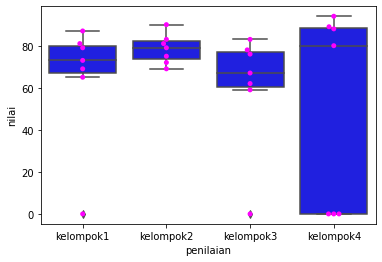

In [ ]:
ax = sns.boxplot(x='penilaian',y='nilai', data=shape, color='blue')
ax = sns.swarmplot(x='penilaian', y='nilai', data=shape, color='magenta')
plt.show()

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
fvalue, pvalue = stats.f_oneway(data['kelompok1'], data['kelompok2'], data['kelompok3'], data['kelompok4'])
print(fvalue, pvalue)

0.9747509592456761 0.4209830973436973


In [ ]:
model = ols('nilai ~ C(penilaian)', data=shape).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(penilaian),2876.107143,3.0,0.974751,0.420983
Residual,23604.857143,24.0,NaN,NaN


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 84 kB 2.4 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=09e944169a36b71b92d687db0878f3813724106279eb4f6178a8443bad55479b
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=200029abdcd6679630419653f46afc3ac6d63e4260ffeafd032c6e320bc62346
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
from bioinfokit.analys import stat

In [ ]:
res = stat()
res.anova_stat(shape, res_var='nilai',anova_model='nilai ~ C(penilaian)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(penilaian),3.0,2876.107143,958.702381,0.974751,0.420983
Residual,24.0,23604.857143,983.535714,NaN,NaN


Dikarenakan nilai P(0.42) yang didapat lebih besar dari alpha (0.05), maka H0 diterima yang artinya Pelatihan tidak memberikan peningkatan rata-rata prestasi yang signifikan kepada karyawan